In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read in the data

### RSS dataset

In [2]:
df = pd.read_csv('Public_VLP_Dataset.csv', index_col = 'index')
df.head(10)

,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10,L11,x,y
index,,,,,,,,,,,,,
0,15.0,23.893122,39.405362,191.227092,68.628566,15.0,86.628103,282.928669,64.751934,35.857665,15.0,3.684493,1.733080
1,15.0,25.834706,40.269304,215.163688,53.172126,15.0,65.938937,314.402304,67.591192,35.151599,15.0,3.682122,1.518624
2,15.0,19.699516,43.623517,234.470798,43.794282,15.0,53.995155,331.835963,69.891430,28.650815,15.0,3.680984,1.276831
3,15.0,19.363725,43.220782,222.716910,39.423066,15.0,41.133686,336.608655,71.597389,28.532250,15.0,3.680257,1.034484
4,15.0,17.633501,40.052924,208.304308,28.006412,15.0,33.895850,314.559317,69.771484,24.902615,15.0,3.679607,0.703489
5,15.0,17.727616,42.723356,206.825400,26.805612,15.0,32.276864,284.434066,68.717507,25.330654,15.0,3.678878,0.462427
6,15.0,15.108934,41.248565,220.922869,31.797890,15.0,32.275012,323.923756,77.398389,26.062942,15.0,3.646504,0.642071
7,15.0,15.000000,40.159962,215.998156,30.603817,15.0,38.635451,341.809341,78.464496,29.550591,15.0,3.657716,0.849839
8,15.0,17.086172,38.699253,236.017112,36.825146,15.0,47.164610,341.800246,76.823222,31.218162,15.0,3.641089,1.058537


There are 13 columns, 11 being for the VLP RSS data (L1-L11) and the final 2 providing the x and y ground truth coordinates


### Luminaire position dataset

In [3]:
luminaire_df = pd.read_csv('luminaire_locations.csv', index_col = "Luminaire")
luminaire_df

,x,y,z
Luminaire,,,
L1,0.526,5.948,2.35
L2,0.526,3.550,2.35
L3,0.526,1.145,2.35
L4,2.327,1.145,2.35
L5,2.327,3.550,2.35
L6,4.726,5.948,2.35
L7,4.726,3.550,2.35
L8,4.726,1.145,2.35
L9,6.525,1.145,2.35


The coordiantes provided are to the center of the luminaires surface.

## Visulising data
The following plot provides a quick way to view the data

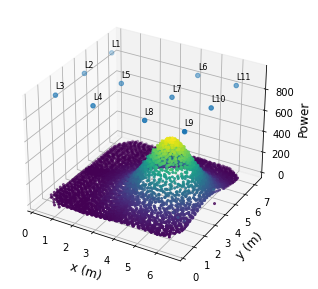

In [4]:
target_luminaire = 'L7' # select the luminaire of interest

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('x (m)', fontsize = 12)
ax.set_ylabel('y (m)', fontsize = 12)
ax.set_zlabel('Power', fontsize = 12)

ax.scatter(df['x'],df['y'],df[target_luminaire], c = df[target_luminaire], s = 4)

ax.scatter(luminaire_df.x, luminaire_df.y,950)
for i in range(len(luminaire_df)):    
    ax.text(luminaire_df.iloc[i,0],luminaire_df.iloc[i,1], 1010,luminaire_df.iloc[i,:].name, fontsize = 8)


## Example ML Implementation
This section will provide a quick demo of how to implement kNN

#### Split data into test and train sets

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 42)
X_train = train[['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11']].values
X_test = test[['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11']].values
y_train = train[['x','y']].values
y_test = test[['x','y']].values

#### Scale features

In [15]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


#### Create kNN regressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsRegressor(
    n_neighbors = 5,
    weights = 'distance',
    metric = 'manhattan')

#### Train and predict

In [19]:
kNN.fit(X_train, y_train)
y_predictions = kNN.predict(X_test)

#### Assess performance

In [25]:
def calculate_errors(source, target):
    errs = []
    for i in range(len(source)):
        pred = source[i]
        tar = target[i]
        err = np.linalg.norm(pred-tar)
        errs.append(err)
    return np.array(errs)
prediction_errors = calculate_errors(y_predictions, y_test)

In [43]:
print('Mean kNN error : ',errors.mean())

Mean kNN error :  0.10884582452282145


Text(0, 0.5, 'Error (m)')

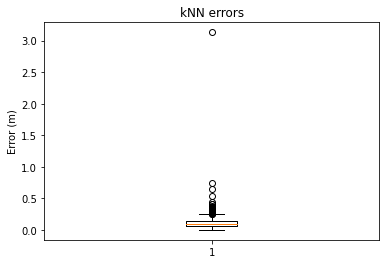

In [45]:
_ = plt.boxplot(prediction_errors)
plt.title('kNN errors')
plt.ylabel('Error (m)')

There is one major outlier that needs to be removed before we can plot a histogram

Text(0, 0.5, 'count')

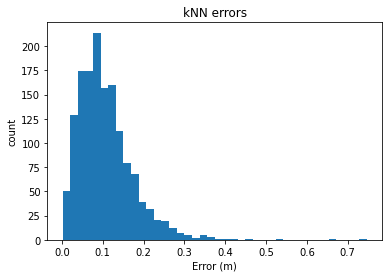

In [41]:
_ = plt.hist(prediction_errors[prediction_errors < 2], bins = 40)
plt.title('kNN errors')
plt.xlabel('Error (m)')
plt.ylabel('count')